In [18]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
path = 'shared_data_read_only/Data/AfriKids/InternalData/Project_Surveys/2023_Annual_Survey_Data/Chief__Queen_Mother-2024-02-03-11-57-35.xlsx'


xls = pd.ExcelFile(path)
df = pd.read_excel(xls, 'FINAL_Chief & Queen Mother')

In [33]:
resp_name = df["Title of Respondent"]
name_community = df["2.Name of Community"]
district_name = df["District"]
reduct_violence_QUAL = df["a. To what extent have you noticed a reduction in violence, exploitation, and harmful practices against children in your community? (Qualitative)"]
barriers_to_viol_QUAL = df["b. What are the specific challenges or barriers hindering the reduction of violence and exploitation against children? (Qualitative)"]

reduct_violence_QUANT = df["c. On a scale of 1 to 10, with 1 being no reduction and 10 being a significant reduction, how would you rate the overall reduction in violence against children? (Quantitative)"]

afrikids1_QUAL = df["b. If yes, how have engagements and events organized by AfriKids in the community contributed to increasing awareness about child rights, especially among girls and children with disabilities? (Qualitative)"]
afrikids_examples_QUAL = df["c. Can you provide specific examples of engagements or events by AfriKids that have been particularly effective in raising awareness about child rights? (Qualitative)"]

socioeconomic_QUAL = df["c. Can you provide examples of socio-cultural practices that community members are now able to identify as harmful to children? (Qualitative)"]

actions_post_QUAL = df["c. If yes, can you provide examples of initiatives or actions you've taken to promote child rights and discourage harmful practices? (Qualitative)"]

particip_training = df["a.       Have you participated in training sessions to enhance their capacity in ensuring child protection? (Yes/No) (Qualitative)"]

training_provider = df["b.      Who organized the training?"]

examples_training_sessions = df["d. Can you share examples of how training sessions have contributed to improving the capacity of stakeholders and duty bearers in child protection? (Qualitative)"]

In [80]:
reduct_violence_QUAL

0     It has reduced. But it has not stopped completely
1                 Child abuse is no longer in existence
2                           It has reduced drastically 
3                     Reporting such cases have reduced
4            There is reduction of violence in children
5                                It has totally reduced
6                      Child abuse cases are increasing
7                              The cases have increased
8     Reduction of reported cases being brought to m...
9     I have realised that parents  have knowledge o...
10                  It has been reduced in my community
11                               it has reduced totally
12                         There is totally a reduction
13                             There is total reduction
14                   It has reduced by about 85 percent
15                                    It is now minimal
16                           It has reduced drastically
17                                        It is 

In [59]:

df_filtered = pd.DataFrame(training_provider)


In [87]:
df_filtered["AfriKids_Bool"] = training_provider == 'Afrikids'
df_filtered["name_community"] = name_community
df_filtered["resp_name"] = resp_name
df_filtered["reduct_violence_QUANT"] = reduct_violence_QUANT
df_filtered["reduct_violence_QUAL"] = reduct_violence_QUAL

df_filtered["particip_training"] = particip_training

chief_df = df_filtered[df_filtered['resp_name'] == 'Chief']
queen_df = df_filtered[df_filtered['resp_name'] == 'Queen Mother']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Aniise '),
  Text(1, 0, 'Bazua'),
  Text(2, 0, 'Boko'),
  Text(3, 0, 'Tansia'),
  Text(4, 0, 'Yalugu'),
  Text(5, 0, 'Baasa'),
  Text(6, 0, 'Gotisaliga'),
  Text(7, 0, 'Kasiesa'),
  Text(8, 0, 'Kunkwak'),
  Text(9, 0, 'Pintengsa '),
  Text(10, 0, 'Tuedema'),
  Text(11, 0, 'Wiesi '),
  Text(12, 0, 'Jadema'),
  Text(13, 0, 'Kikaayiri'),
  Text(14, 0, 'Prima'),
  Text(15, 0, 'Soo'),
  Text(16, 0, 'Yizesi')])

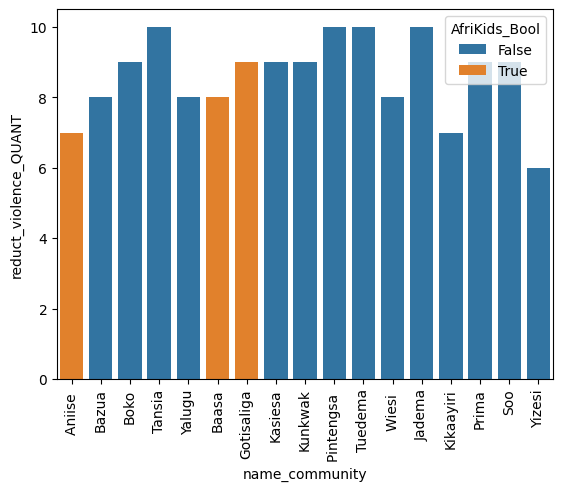

In [69]:
fig, ax = plt.subplots()

sns.barplot(x = chief_df["name_community"], y = chief_df["reduct_violence_QUANT"], hue = chief_df["AfriKids_Bool"])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Aniise '),
  Text(1, 0, 'Bazua'),
  Text(2, 0, 'Boko'),
  Text(3, 0, 'Tansia'),
  Text(4, 0, 'Yalugu'),
  Text(5, 0, 'Baasa'),
  Text(6, 0, 'Gotisaliga'),
  Text(7, 0, 'Jadema'),
  Text(8, 0, 'Kasiesa '),
  Text(9, 0, 'Kunkwak'),
  Text(10, 0, 'Pintengsa'),
  Text(11, 0, 'Tuedema'),
  Text(12, 0, 'Wiesi'),
  Text(13, 0, 'Kategiri'),
  Text(14, 0, 'Kikaayiri'),
  Text(15, 0, 'Yizesi')])

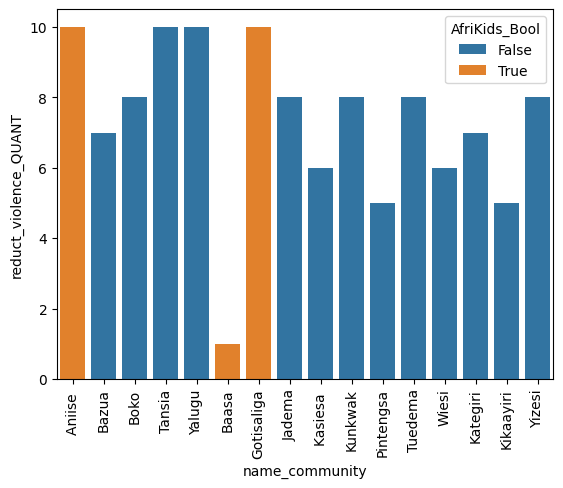

In [70]:
sns.barplot(x = queen_df["name_community"], y = queen_df["reduct_violence_QUANT"], hue = queen_df["AfriKids_Bool"])
plt.xticks(rotation=90)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

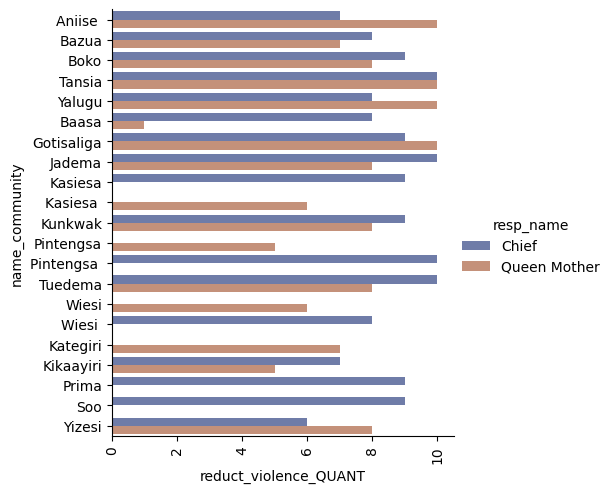

In [82]:
g = sns.catplot(
    data=df_filtered, kind="bar",
    y="name_community", x="reduct_violence_QUANT", hue="resp_name", palette="dark", alpha=.6, height=5)
plt.xticks(rotation = 90)

In [86]:
responses = df_filtered["reduct_violence_QUAL"]

# Define positive and negative keywords
positive_keywords = ['reduced', 'totally', 'minimal', 'low', 'reduction', 'decreased', 'less', 'no longer', 'tackled', 'solved', 'improved']
negative_keywords = ['increasing', 'high', 'greedy', 'untruthful', 'very high', 'bad']

# Function to check sentiment based on keywords
def keyword_sentiment(text):
    text_lower = text.lower()  # Convert to lowercase for matching
    if any(word in text_lower for word in positive_keywords):
        return 'Positive'
    elif any(word in text_lower for word in negative_keywords):
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the responses
sentiment_labels = [keyword_sentiment(response) for response in responses]

# Print results
for response, sentiment in zip(responses, sentiment_labels):
    print(f"Response: {response} | Sentiment: {sentiment}")


Response: It has reduced. But it has not stopped completely | Sentiment: Positive
Response: Child abuse is no longer in existence | Sentiment: Positive
Response: It has reduced drastically  | Sentiment: Positive
Response: Reporting such cases have reduced | Sentiment: Positive
Response: There is reduction of violence in children | Sentiment: Positive
Response: It has totally reduced | Sentiment: Positive
Response: Child abuse cases are increasing | Sentiment: Negative
Response: The cases have increased | Sentiment: Neutral
Response: Reduction of reported cases being brought to me concerning violence and harmful practice | Sentiment: Positive
Response: I have realised that parents  have knowledge on the effect of these practices on children and so they do not practice them. | Sentiment: Neutral
Response: It has been reduced in my community | Sentiment: Positive
Response: it has reduced totally | Sentiment: Positive
Response: There is totally a reduction | Sentiment: Positive
Response: T